In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import keras

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences

from imblearn.over_sampling import RandomOverSampler
import pickle

## Attribute 14 Test

In [2]:
df = pd.read_csv('ghg_labelled.csv')

In [3]:
df.head()

,words,GT
0,Definition of Science Based Targets (SBTi) Wit...,1
1,LOOKING AHEAD Befimmo aims to provide quantita...,1
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1
3,The TCFD structured its recommendations around...,0
4,More details on the TCFD framework and impleme...,1


In [4]:
len(df)

751

In [5]:
X = df['words']

In [6]:
y = df['GT']

### Word Embedding

In [7]:
X = X.apply(lambda x: x.lower())

In [8]:
X

0      definition of science based targets (sbti) wit...
1      looking ahead befimmo aims to provide quantita...
2      target: fully aligned by 2023 description and ...
3      the tcfd structured its recommendations around...
4      more details on the tcfd framework and impleme...
                             ...                        
746    indirect ghg emissions related to the use by c...
747    improving detection and measurement satellites...
748    as of 2018, transportation generated approxima...
749    the company follows the oil & gas industry rep...
750    ghg yoto protocol: carbon dioxide (co2), the g...
Name: words, Length: 751, dtype: object

In [9]:
tfidf = TfidfVectorizer()

In [10]:
x = tfidf.fit_transform(X)

In [11]:
X_encoded = pd.DataFrame(x.toarray())

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.144078,0.0,0.0,0.0
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.195542,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Logistic Regression

In [23]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = model1.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


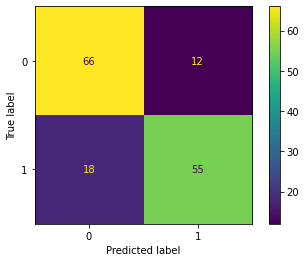

In [25]:
plot_confusion_matrix(model1, X_test, y_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        78
           1       0.82      0.75      0.79        73

    accuracy                           0.80       151
   macro avg       0.80      0.80      0.80       151
weighted avg       0.80      0.80      0.80       151



In [27]:
lr_pred = y_pred

## Random Forest

In [33]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 16],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [34]:
model2 = RandomForestClassifier()

In [35]:
random_search = RandomizedSearchCV(estimator = model2, param_distributions = param_grid,  n_iter = 100, cv = 3, verbose=2, random_state=42)

In [36]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=20; total t

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, max_f

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [37]:
res_dict = random_search.best_params_
res_dict

{'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [38]:
model2 = RandomForestClassifier(n_estimators=res_dict['n_estimators'], min_samples_split=res_dict['min_samples_split'], 
                                min_samples_leaf=res_dict['min_samples_leaf'], bootstrap=res_dict['bootstrap'], 
                                max_depth = res_dict['max_depth'], random_state=42)

In [39]:
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


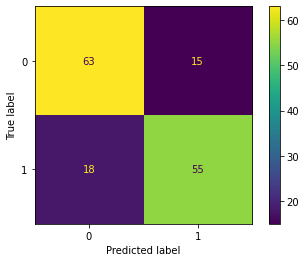

In [40]:
plot_confusion_matrix(model2, X_test, y_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        78
           1       0.79      0.75      0.77        73

    accuracy                           0.78       151
   macro avg       0.78      0.78      0.78       151
weighted avg       0.78      0.78      0.78       151



In [42]:
rf_pred = y_pred

## LSTM

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seq = tok.texts_to_sequences(X_train)
seq_matrix = pad_sequences(seq, maxlen=max_len)

In [30]:
model3 = Sequential()
model3.add(Embedding(1000, 64, input_length=100))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

In [31]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4

In [32]:
model3.fit(seq_matrix, y_train, batch_size=32, epochs=25)

Epoch 1/25
19/19 [==============================] - 5s 67ms/step - loss: 0.6943 - accuracy: 0.4650
Epoch 2/25
19/19 [==============================] - 2s 81ms/step - loss: 0.6917 - accuracy: 0.5533
Epoch 3/25
19/19 [==============================] - 2s 81ms/step - loss: 0.6778 - accuracy: 0.6917
Epoch 4/25
19/19 [==============================] - 1s 79ms/step - loss: 1.0249 - accuracy: 0.7633
Epoch 5/25
19/19 [==============================] - 2s 86ms/step - loss: 0.4472 - accuracy: 0.8317
Epoch 6/25
19/19 [==============================] - 2s 82ms/step - loss: 0.3188 - accuracy: 0.8800
Epoch 7/25
19/19 [==============================] - 2s 82ms/step - loss: 190176.9375 - accuracy: 0.8633
Epoch 8/25
19/19 [==============================] - 2s 82ms/step - loss: 0.3187 - accuracy: 0.8867
Epoch 9/25
19/19 [==============================] - 2s 79ms/step - loss: 0.2416 - accuracy: 0.9267
Epoch 10/25
19/19 [==============================] - 2s 85ms/step - loss: 0.2071 - accuracy: 0.9283
Epoc

In [33]:
test_seq = tok.texts_to_sequences(X_test)
test_seq_matrix = pad_sequences(test_seq,maxlen=max_len)

In [34]:
score = model3.evaluate(test_seq_matrix, y_test)

5/5 [==============================] - 1s 27ms/step - loss: 1520.8502 - accuracy: 0.6755


In [35]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1520.8502197265625
Test accuracy: 0.6754966974258423


In [36]:
test_seq_matrix

array([[  0,   0,   0, ...,   3, 141, 324],
       [  0,   0,   0, ..., 844,  12, 262],
       [  0,   0,   0, ...,  32,   6,   2],
       ...,
       [  0,   0,   0, ...,   3,   4,   6],
       [  0,   0,   0, ...,   3, 151, 136],
       [  0,   0,   0, ..., 317,   7, 205]])

In [37]:
pred = model3.predict(test_seq_matrix)

5/5 [==============================] - 1s 25ms/step


In [38]:
pred

array([[9.94550943e-01],
       [9.99120891e-01],
       [9.77485716e-01],
       [9.98370767e-01],
       [5.65186610e-07],
       [9.11483228e-01],
       [9.98395383e-01],
       [9.28298056e-01],
       [9.81050432e-01],
       [6.13506138e-01],
       [2.21283899e-05],
       [4.16912407e-01],
       [9.95447218e-01],
       [6.46090019e-04],
       [9.96447802e-01],
       [9.98347282e-01],
       [3.07777838e-27],
       [9.87902045e-01],
       [9.82519006e-04],
       [9.74855006e-01],
       [2.42939163e-02],
       [1.17793627e-01],
       [9.22893763e-01],
       [3.12730409e-02],
       [9.99822736e-01],
       [4.25101425e-05],
       [6.03774488e-01],
       [9.95836973e-01],
       [3.75332911e-06],
       [3.70231061e-03],
       [9.91002798e-01],
       [9.75062549e-01],
       [1.72077620e-04],
       [9.90391493e-01],
       [9.94807780e-01],
       [1.06940272e-23],
       [6.45254850e-01],
       [9.97159481e-01],
       [0.00000000e+00],
       [6.08406670e-04],


In [39]:
y_pred = np.where(pred < 0.5, 0, 1)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69        78
           1       0.67      0.66      0.66        73

    accuracy                           0.68       151
   macro avg       0.68      0.67      0.67       151
weighted avg       0.68      0.68      0.68       151



In [41]:
lstm_pred = y_pred

### Using Tfidf

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape

(600, 2906)

In [44]:
model3 = Sequential()
model3.add(Embedding(256, 64, input_length=X_train.shape[1]))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [45]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2906, 64)          16384     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 57,857
Trainable params: 57,857
Non-trainable params: 0
_________________________________________________________________


In [46]:
#model3.fit(X_train, y_train, batch_size=64, epochs=20)

In [47]:
#score = model3.evaluate(X_test, y_test)

In [48]:
#print("Test loss:", score[0])
#print("Test accuracy:", score[1])

In [49]:
#pred = model3.predict(X_test)
#y_pred = np.where(pred < 0.5, 0, 1)

In [50]:
#y_pred

In [51]:
#print(classification_report(y_test, y_pred))

### AdaBoost

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [44]:
ada = AdaBoostClassifier(random_state=42)

In [45]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1.0, 10]
}

In [46]:
random_search = RandomizedSearchCV(estimator = ada, param_distributions = param_grid,  n_iter = 100, cv = 3, verbose=2, random_state=42)

In [47]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.7s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.7s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.7s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.7s
[CV] END .................le

[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.7s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.7s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.7s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   1.1s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.3s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.1s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.3s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.5s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.6s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.6s
[CV] END .................le

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1.0, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [48]:
res_dict = random_search.best_params_
res_dict

{'n_estimators': 60, 'learning_rate': 0.2}

In [49]:
ada = AdaBoostClassifier(n_estimators = res_dict['n_estimators'], learning_rate = res_dict['learning_rate'], 
                        random_state=42)

In [50]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=60, random_state=42)

In [51]:
y_pred = ada.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


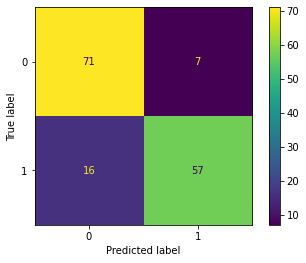

In [52]:
plot_confusion_matrix(ada, X_test, y_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        78
           1       0.89      0.78      0.83        73

    accuracy                           0.85       151
   macro avg       0.85      0.85      0.85       151
weighted avg       0.85      0.85      0.85       151



In [54]:
ada_pred = y_pred

### BERTQA

In [64]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

In [65]:
model_name = "deepset/roberta-base-squad2"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

In [66]:
ones = df[df['GT'] == 1]

In [67]:
ones

,words,GT
0,Definition of Science Based Targets (SBTi) Wit...,1
1,LOOKING AHEAD Befimmo aims to provide quantita...,1
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1
4,More details on the TCFD framework and impleme...,1
5,Our ESG journey Our 2030 commitments Performan...,1
...,...,...
743,To calculate the aforementioned scope 3 emissi...,1
744,We do not have oil and gas reserves in areas c...,1
745,This Sustainability & Climate 2022 Progress Re...,1
749,The Company follows the oil & gas industry rep...,1


In [65]:
ones.to_csv('ghg_checked.csv', index=False)

In [66]:
ones

,words,GT
0,Definition of Science Based Targets (SBTi) Wit...,1
1,LOOKING AHEAD Befimmo aims to provide quantita...,1
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1
4,More details on the TCFD framework and impleme...,1
5,Our ESG journey Our 2030 commitments Performan...,1
...,...,...
743,To calculate the aforementioned scope 3 emissi...,1
744,We do not have oil and gas reserves in areas c...,1
745,This Sustainability & Climate 2022 Progress Re...,1
749,The Company follows the oil & gas industry rep...,1


In [70]:
ones['keywords'] = None

C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_9860\3832277006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['keywords'] = None


In [71]:
ones

,words,GT,keywords
0,Definition of Science Based Targets (SBTi) Wit...,1,None
1,LOOKING AHEAD Befimmo aims to provide quantita...,1,None
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1,None
4,More details on the TCFD framework and impleme...,1,None
5,Our ESG journey Our 2030 commitments Performan...,1,None
...,...,...,...
743,To calculate the aforementioned scope 3 emissi...,1,None
744,We do not have oil and gas reserves in areas c...,1,None
745,This Sustainability & Climate 2022 Progress Re...,1,None
749,The Company follows the oil & gas industry rep...,1,None


In [95]:
ones['words'][0]

'Definition of Science Based Targets (SBTi) With the help of SBTi and following the complete revision of its carbon footprint in accordance with the GHG Protocol.'

In [109]:
from keybert import KeyBERT
from tqdm.notebook import tqdm

In [110]:
bert=KeyBERT()

In [111]:
kw = []
for i in tqdm(ones['words']):
    kw.append(bert.extract_keywords(i, keyphrase_ngram_range=(1, 1), stop_words='english'))

  0%|          | 0/355 [00:00<?, ?it/s]

In [113]:
ones['kw'] = kw

C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_9860\4824665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['kw'] = kw


In [114]:
ones

,words,GT,keywords,kw
0,Definition of Science Based Targets (SBTi) Wit...,1,"['GHG', 'SBTi', 'TCFD', 'SASB']","[(sbti, 0.4794), (targets, 0.4196), (science, ..."
1,LOOKING AHEAD Befimmo aims to provide quantita...,1,"['SBTi', 'TCFD', 'SASB']","[(befimmo, 0.4072), (climate, 0.3598), (tcfd, ..."
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1,"['SBTi', 'TCFD', 'SASB']","[(tcfd, 0.4205), (befimmo, 0.3972), (2021, 0.3..."
4,More details on the TCFD framework and impleme...,1,"['SBTi', 'TCFD', 'SASB']","[(tcfd, 0.6651), (framework, 0.4223), (impleme..."
5,Our ESG journey Our 2030 commitments Performan...,1,"['SBTi', 'TCFD', 'SASB']","[(kpis, 0.4649), (esg, 0.3891), (tcfd, 0.3596)..."
...,...,...,...,...
743,To calculate the aforementioned scope 3 emissi...,1,"['GHG', 'SBTi', 'TCFD', 'SASB']","[(emissions, 0.6148), (scope, 0.3511), (produc..."
744,We do not have oil and gas reserves in areas c...,1,"['SBTi', 'TCFD', 'SASB']","[(indigenous, 0.3091), (reserves, 0.3001), (la..."
745,This Sustainability & Climate 2022 Progress Re...,1,"['SBTi', 'TCFD', 'SASB']","[(2021, 0.4623), (2022, 0.4578), (tcfd1, 0.431..."
749,The Company follows the oil & gas industry rep...,1,"['GHG', 'SBTi', 'TCFD', 'SASB']","[(ipieca, 0.389), (guidelines, 0.3779), (ghg, ..."


In [121]:
'sbti' in ones['kw'][0]

False

In [133]:
for index, rows in ones.iterrows():
    res = []
    if ('ghg' in rows['words'].lower()) or (r'scope \d' in rows['words'].lower()):
        res.append('GHG')
    if ('sbti' in rows['words'].lower()) or ('science based targets' in rows['words'].lower()):
        res.append('SBTi')
    if ('tcfd' in rows['words'].lower()) or ('climate-related financial disclosures' in rows['words'].lower()):
        res.append('TCFD')
    if ('sasb' in rows['words'].lower()) or ('sustainability accounting' in rows['words'].lower()):
        res.append('SASB')
    
    print(res)
    ones.at[index, 'keywords'] = str(res)

['GHG', 'SBTi']
['TCFD']
['TCFD']
['TCFD']
['TCFD', 'SASB']
['SASB']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG', 'SBTi']
['GHG']
['SBTi']
['SBTi']
['GHG']
['TCFD', 'SASB']
['TCFD', 'SASB']
['SBTi']
['TCFD', 'SASB']
['TCFD', 'SASB']
['TCFD', 'SASB']
['TCFD']
['TCFD']
['SBTi']
['SBTi']
['GHG', 'SBTi']
['GHG']
['GHG', 'SBTi']
['SBTi']
['TCFD']
['TCFD']
['SBTi']
['GHG']
['GHG', 'TCFD', 'SASB']
['GHG']
['SBTi']
['GHG']
['SBTi']
['GHG']
['SBTi']
['TCFD', 'SASB']
['SASB']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG']
['GHG', 'TCFD', 'SASB']
['GHG']
['SBTi']
['SBTi']
['TCFD']
['TCFD']
['GHG']
['GHG']
['GHG']
['SBTi']
['TCFD']
['TCFD']
['TCFD']
['TCFD']
['GHG']
['TCFD']
['TCFD']
['TCFD']
['TCFD']
['TCFD']
['TCFD']
['SBTi']
['TCFD']
['GHG']
['TCFD']
['SASB']
['GHG']
['GHG']
['TCFD', 'SASB']
['GHG']
['GHG']
['SBTi']
['GHG']
['SASB']
['SASB']
['GHG', 'TCFD']
['TCFD']
['TCFD']
['TCFD']
['GHG']
['GHG']
['GHG']
['GHG']
['TCFD']
['TCFD']
['GHG', 'TCFD']
['GHG']
['TCFD']
[

In [132]:
ones

,words,GT,keywords,kw
0,Definition of Science Based Targets (SBTi) Wit...,1,"['GHG', 'SBTi']","[(sbti, 0.4794), (targets, 0.4196), (science, ..."
1,LOOKING AHEAD Befimmo aims to provide quantita...,1,['TCFD'],"[(befimmo, 0.4072), (climate, 0.3598), (tcfd, ..."
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1,['TCFD'],"[(tcfd, 0.4205), (befimmo, 0.3972), (2021, 0.3..."
4,More details on the TCFD framework and impleme...,1,['TCFD'],"[(tcfd, 0.6651), (framework, 0.4223), (impleme..."
5,Our ESG journey Our 2030 commitments Performan...,1,"['TCFD', 'SASB']","[(kpis, 0.4649), (esg, 0.3891), (tcfd, 0.3596)..."
...,...,...,...,...
743,To calculate the aforementioned scope 3 emissi...,1,['GHG'],"[(emissions, 0.6148), (scope, 0.3511), (produc..."
744,We do not have oil and gas reserves in areas c...,1,['SASB'],"[(indigenous, 0.3091), (reserves, 0.3001), (la..."
745,This Sustainability & Climate 2022 Progress Re...,1,['TCFD'],"[(2021, 0.4623), (2022, 0.4578), (tcfd1, 0.431..."
749,The Company follows the oil & gas industry rep...,1,['GHG'],"[(ipieca, 0.389), (guidelines, 0.3779), (ghg, ..."


In [65]:
res = []
q1 = 'Which target was applied?'
q2 = 'Which protocol was applied?'
q3 = 'What methodology was applied?'
q4 = 'What recommendations was applied?'
for i in ones['words']:
    QA_1 = {
        'question': q1,
        'context': i
    }
    QA_2 = {
        'question': q2,
        'context': i
    }
    QA_3 = {
        'question': q3,
        'context': i
    }
    QA_4 = {
        'question': q4,
        'context': i
    }
    
    ans1 = nlp(QA_1)['answer']
    score1 = nlp(QA_1)['score']
    ans2 = nlp(QA_2)['answer']
    score2 = nlp(QA_2)['score']
    ans3 = nlp(QA_3)['answer']
    score3 = nlp(QA_3)['score']
    ans4 = nlp(QA_4)['answer']
    score4 = nlp(QA_4)['score']
    
    maxi = max([score1, score2, score3, score4])
    if maxi == score1:
        res.append(ans1)
    elif maxi == score2:
        res.append(ans2)
    elif maxi == score4:
        res.append(ans4)
    else:
        res.append(ans3)
    

In [66]:
ones['answer'] = np.array(res)

C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_1580\612445749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['answer'] = np.array(res)


In [67]:
ones

,words,GT,answer
0,Definition of Science Based Targets (SBTi) Wit...,1,GHG Protocol
1,LOOKING AHEAD Befimmo aims to provide quantita...,1,TCFD
2,Target: fully aligned by 2023 DESCRIPTION AND ...,1,Task Force on Climate-Related Financial Disclo...
4,More details on the TCFD framework and impleme...,1,recommendations
5,Our ESG journey Our 2030 commitments Performan...,1,Net Zero carbon Place based approach
...,...,...,...
743,To calculate the aforementioned scope 3 emissi...,1,GHG Protocol
744,We do not have oil and gas reserves in areas c...,1,do not have oil and gas reserves in areas clos...
745,This Sustainability & Climate 2022 Progress Re...,1,2021
749,The Company follows the oil & gas industry rep...,1,GHG Protocol


In [68]:
ones['answer'].str.lower().str.contains('ghg|tcfd|task force on climate-related financial disclosure|sbti|science-based|sasb').sum()

175

### One Class SVM

In [68]:
ocsvm = OneClassSVM()

In [69]:
ocsvm = OneClassSVM(kernel = 'rbf')

In [70]:
ocsvm.fit(X_train, y_train)

OneClassSVM()

In [71]:
y_pred = ocsvm.predict(X_test)

In [72]:
y_pred

array([-1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
      dtype=int64)

In [73]:
y_pred = np.vectorize(lambda x: 0 if x == -1 else x)(y_pred)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.74      0.65        78
           1       0.60      0.41      0.49        73

    accuracy                           0.58       151
   macro avg       0.59      0.58      0.57       151
weighted avg       0.59      0.58      0.57       151



In [75]:
ocsvm_pred = y_pred

In [55]:
res = pd.DataFrame([lr_pred, rf_pred, ada_pred]).transpose()

In [56]:
res

,0,1,2
0,1,1,1
1,1,1,0
2,1,1,0
3,1,1,1
4,0,0,0
...,...,...,...
146,0,0,0
147,0,0,0
148,0,0,0
149,0,0,0


In [57]:
res

,0,1,2
0,1,1,1
1,1,1,0
2,1,1,0
3,1,1,1
4,0,0,0
...,...,...,...
146,0,0,0
147,0,0,0
148,0,0,0
149,0,0,0


In [58]:
res['total'] = res.mode(axis=1)[0]

In [59]:
res['total']

0      1
1      1
2      1
3      1
4      0
      ..
146    0
147    0
148    0
149    0
150    0
Name: total, Length: 151, dtype: int64

In [60]:
res

,0,1,2,total
0,1,1,1,1
1,1,1,0,1
2,1,1,0,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
146,0,0,0,0
147,0,0,0,0
148,0,0,0,0
149,0,0,0,0


In [61]:
print(accuracy_score(y_test, res['total']))
print(precision_score(y_test, res['total']))
print(recall_score(y_test, res['total']))
print(f1_score(y_test, res['total']))

0.8145695364238411
0.835820895522388
0.7671232876712328
0.8


In [83]:
lr_14 = 'lr_14_model.sav'
rf_14 = 'rf_14_model.sav'
ada_14 = 'ada_14_model.sav'
tfidf_14 = 'tfidf_14_model.sav'

In [84]:
pickle.dump(tfidf, open(tfidf_14, 'wb'))

In [85]:
pickle.dump(model1, open(lr_14, 'wb'))

In [86]:
pickle.dump(model2, open(rf_14, 'wb'))
pickle.dump(ada, open(ada_14, 'wb'))

## Attribute 15 Test

In [3]:
df_ext = pd.read_csv('ext_labelled.csv')

In [4]:
df_ext

,words,GT
0,Compliance with and implementation of the BMW ...,0
1,"In addition, we want to foster transparency in...",0
2,"In future, it will be possible to acknowledge ...",0
3,In collaboration with the RMI and the Chinese ...,0
4,The certified locations are audited by externa...,1
...,...,...
514,The Sustainable Development Office team Certai...,1
515,Please see the Limited Assurance Statement.,0
516,The results determine which suppliers need to ...,0
517,Please refer to the independent limited assura...,0


In [24]:
df_ext_o = df_ext[df_ext['GT'] == 1]

In [25]:
df_ext_o.to_csv('ext_ones.csv', index=False)

In [5]:
X = df_ext['words']
y = df_ext['GT']

### Word Embedding

In [6]:
X = X.apply(lambda x: x.lower())
X

0      compliance with and implementation of the bmw ...
1      in addition, we want to foster transparency in...
2      in future, it will be possible to acknowledge ...
3      in collaboration with the rmi and the chinese ...
4      the certified locations are audited by externa...
                             ...                        
514    the sustainable development office team certai...
515          please see the limited assurance statement.
516    the results determine which suppliers need to ...
517    please refer to the independent limited assura...
518    description of quality assurance process and r...
Name: words, Length: 519, dtype: object

In [7]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(X)
X_encoded = pd.DataFrame(x.toarray())

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192
433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ros = RandomOverSampler(sampling_strategy=1, random_state=42)

In [11]:
X_res, y_res = ros.fit_resample(X_train, y_train)

In [12]:
y_res.value_counts()

0    354
1    354
Name: GT, dtype: int64

In [13]:
y_test.value_counts()

0    87
1    17
Name: GT, dtype: int64

In [14]:
354+87

441

### Logistic Regression

In [15]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [16]:
y_pred = model1.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


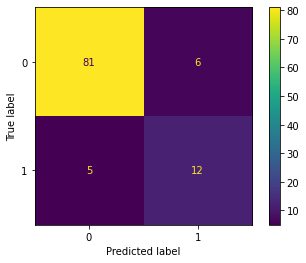

In [17]:
plot_confusion_matrix(model1, X_test, y_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        87
           1       0.67      0.71      0.69        17

    accuracy                           0.89       104
   macro avg       0.80      0.82      0.81       104
weighted avg       0.90      0.89      0.90       104



In [19]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8942307692307693
0.6666666666666666
0.7058823529411765
0.6857142857142857


In [20]:
lr_pred = y_pred

### Random Forest

In [103]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 16],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [104]:
model2 = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = model2, param_distributions = param_grid,  
                                   n_iter = 100, cv = 3, verbose=2, random_state=42)
random_search.fit(X_res, y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=20; total t

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=80; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_f

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [105]:
random_search.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [106]:
model2 = RandomForestClassifier(n_estimators=70, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

In [107]:
model2.fit(X_res, y_res)
y_pred = model2.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


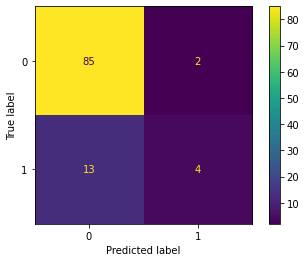

In [108]:
plot_confusion_matrix(model2, X_test, y_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.67      0.24      0.35        17

    accuracy                           0.86       104
   macro avg       0.77      0.61      0.63       104
weighted avg       0.83      0.86      0.83       104



In [110]:
rf_pred = y_pred

### LSTM

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seq = tok.texts_to_sequences(X_train)
seq_matrix = pad_sequences(seq, maxlen=max_len)

In [106]:
model3 = Sequential()
model3.add(Embedding(1000, 64, input_length=100))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(632, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

In [107]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           64000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [108]:
model3.fit(seq_matrix, y_train, batch_size=32, epochs=25)

Epoch 1/25
13/13 [==============================] - 3s 59ms/step - loss: 0.6064 - accuracy: 0.8217
Epoch 2/25
13/13 [==============================] - 1s 83ms/step - loss: 0.4130 - accuracy: 0.8530
Epoch 3/25
13/13 [==============================] - 1s 91ms/step - loss: 0.3658 - accuracy: 0.8530
Epoch 4/25
13/13 [==============================] - 1s 91ms/step - loss: 0.2788 - accuracy: 0.8530
Epoch 5/25
13/13 [==============================] - 1s 92ms/step - loss: 127783788544.0000 - accuracy: 0.8530
Epoch 6/25
13/13 [==============================] - 1s 91ms/step - loss: 0.2351 - accuracy: 0.8530
Epoch 7/25
13/13 [==============================] - 1s 91ms/step - loss: 0.1725 - accuracy: 0.8530
Epoch 8/25
13/13 [==============================] - 1s 86ms/step - loss: 0.1400 - accuracy: 0.8723
Epoch 9/25
13/13 [==============================] - 1s 90ms/step - loss: 0.1302 - accuracy: 0.9542
Epoch 10/25
13/13 [==============================] - 1s 88ms/step - loss: 0.1169 - accuracy: 0.975

In [109]:
test_seq = tok.texts_to_sequences(X_test)
test_seq_matrix = pad_sequences(test_seq,maxlen=max_len)

In [110]:
score = model3.evaluate(test_seq_matrix, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

4/4 [==============================] - 1s 27ms/step - loss: 1.3542 - accuracy: 0.8750
Test loss: 1.3541897535324097
Test accuracy: 0.875


In [111]:
pred = model3.predict(test_seq_matrix)
y_pred = np.where(pred < 0.5, 0, 1)

4/4 [==============================] - 1s 22ms/step


In [112]:
confusion_matrix(y_test, y_pred)

array([[83,  4],
       [ 9,  8]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        87
           1       0.67      0.47      0.55        17

    accuracy                           0.88       104
   macro avg       0.78      0.71      0.74       104
weighted avg       0.86      0.88      0.87       104



In [114]:
lstm_pred = y_pred

### BERTQA

In [259]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

In [260]:
model_name = "deepset/roberta-base-squad2"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

In [261]:
ones = df_ext[df_ext['GT'] == 1]

In [262]:
ones

,words,GT
4,The certified locations are audited by external certification organisations.,1
5,"GRI 102-56 see Assurance Report With the exception of the auditors of the legislation-rele-vant information who were selected by the Supervisory Board of BMW AG the Corporate Reporting, Corporate Communications and Policy as well as Corporate Planning and Product Strategy departments selected the external auditors for the Sustainable Value Report.",1
7,"We conducted our assurance engagement in accordance with the Interna-tional Standard on Assurance Engagements (ISAE) 3000 (Revised): Assur-ance Engagements other than Audits or Reviews of Historical Financial Infor-mation, issued by the IAASB.",1
15,Tian LLP has provided limited assurance on selected key data in this Report.,1
18,"And the result will be audited by a third party, which is a key reference to grant the title.",1
...,...,...
471,"In addition, Deloitte assures key sustainability indicators and targets included in both our Annual Report and Sustainability Report, to the International Standard on Assurance Engagement 3000 (ISAE 3000).",1
472,Here we provide Deloitte LLPs limited assurance statement for our 2021 sustainability data.,1
473,The scope of our independent assurance and the data assured in 2021 is also shared in our Sustainability Basis of Reporting 2021.,1
511,Key performance data has been independently assured by Deloitte.,1


In [263]:
ones['words'][4]

'The certified locations are audited by external certification organisations.'

In [264]:
QA = {
    'question': 'who audited the targets?',
    'context': 'The certified locations are audited by external certification organisations.'
}

In [265]:
res = []
q1 = 'Who audited the targets?'
q2 = 'Who assured the targets?'
q3 = 'Who verified the targets?'
for i in ones['words']:
    QA_1 = {
        'question': q1,
        'context': i
    }
    QA_2 = {
        'question': q2,
        'context': i
    }
    QA_3 = {
        'question': q3,
        'context': i
    }
    
    ans1 = nlp(QA_1)['answer']
    score1 = nlp(QA_1)['score']
    ans2 = nlp(QA_2)['answer']
    score2 = nlp(QA_2)['score']
    ans3 = nlp(QA_3)['answer']
    score3 = nlp(QA_3)['score']
    
    maxi = max([score1, score2, score3])
    if maxi == score1:
        res.append(ans1)
    elif maxi == score2:
        res.append(ans2)
    else:
        res.append(ans3)
    

In [266]:
ones['answer'] = np.array(res)

C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_1580\612445749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['answer'] = np.array(res)


In [267]:
ones.head(10)

,words,GT,answer
4,The certified locations are audited by external certification organisations.,1,external certification organisations
5,"GRI 102-56 see Assurance Report With the exception of the auditors of the legislation-rele-vant information who were selected by the Supervisory Board of BMW AG the Corporate Reporting, Corporate Communications and Policy as well as Corporate Planning and Product Strategy departments selected the external auditors for the Sustainable Value Report.",1,external auditors
7,"We conducted our assurance engagement in accordance with the Interna-tional Standard on Assurance Engagements (ISAE) 3000 (Revised): Assur-ance Engagements other than Audits or Reviews of Historical Financial Infor-mation, issued by the IAASB.",1,IAASB
15,Tian LLP has provided limited assurance on selected key data in this Report.,1,Tian LLP
18,"And the result will be audited by a third party, which is a key reference to grant the title.",1,a third party
25,All (100 percent) of Fords 2019 global facility GHG emissions will be third-party verified to a limited level of assurance in conformance with ISO -1:2018.,1,third-party
28,"As completed for 2018, 100 percent of Fords 2019 GHG emissions from our operations will be third-party verified to a limited level of assurance in accordance with ISO -3.",1,third-party
30,"To demonstrate our commitment to responsibly sourced copper, we have partnered with the Copper Mark, a new, comprehensive social and environmental assurance program.",1,Copper Mark
31,"For 2019, Stantec conducted limited independent assurance of operational management topics such as: waste, water, carbon and energy data for global facilities.",1,Stantec
32,See Stantecs full statement of assurance on page 171.,1,Stantecs


In [117]:
list(ones['answer'])

['external certification organisations',
 'external auditors',
 'IAASB',
 'Tian LLP',
 'a third party',
 'third-party',
 'third-party',
 'Copper Mark',
 'Stantec',
 'Stantecs',
 'Stantec',
 'Stantec',
 'Stantec',
 'Stantecs',
 'Stantec',
 'independent practitioners',
 'independent practitioners',
 'independent practitioners',
 'independent practitioners',
 'the management of HMC',
 'the client',
 'DNV GL',
 'an independent team of sustainability assurance professionals',
 'DNV GL',
 'DNV GL',
 'Lloyds Register Quality Assurance Ltd',
 'DNV GL',
 'DNV GLs',
 'DNV)',
 'DNV',
 'third-party assurance providers',
 'independent auditor',
 'independent auditor',
 'Grant Thornton',
 'Grant Thornton',
 'KPMG',
 'Ernst &Young Assurance Services SRL (EY Romania)',
 'independent limited assurance',
 'internal and external',
 'Independent Practitioner',
 'Independent Practitioner JSC "KPMG',
 'public assurance',
 'Deloitte',
 'Deloitte',
 'Deloitte LLP',
 'third-party',
 '2021',
 'LRQA',
 'PwC',
 '

In [118]:
ones['answer'].str.lower().str.contains('ghg|tcfd|task force on climate-related financial disclosure|sbti|science-based|sasb').sum()

1

### AdaBoost

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [80]:
ada = AdaBoostClassifier(random_state=42)

In [81]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1.0, 10]
}

In [82]:
random_search = RandomizedSearchCV(estimator = ada, param_distributions = param_grid,  n_iter = 100, cv = 3, verbose=2, random_state=42)

In [83]:
random_search.fit(X_res, y_res)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.4s
[CV] END .................learning_rate=0.1, n_

[CV] END .................learning_rate=0.8, n_estimators=40; total time=   0.4s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   0.7s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   0.6s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   0.7s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.0s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   0.9s
[CV] END .................le

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1.0, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [84]:
res_dict = random_search.best_params_
res_dict

{'n_estimators': 90, 'learning_rate': 1.0}

In [85]:
ada = AdaBoostClassifier(n_estimators = res_dict['n_estimators'], learning_rate = res_dict['learning_rate'], 
                        random_state=42)

In [86]:
ada.fit(X_res, y_res)

AdaBoostClassifier(n_estimators=90, random_state=42)

In [87]:
y_pred = ada.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


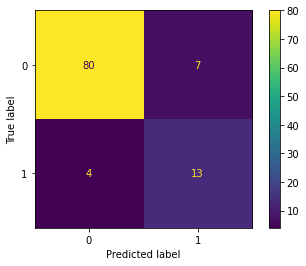

In [88]:
plot_confusion_matrix(ada, X_test, y_test)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        87
           1       0.65      0.76      0.70        17

    accuracy                           0.89       104
   macro avg       0.80      0.84      0.82       104
weighted avg       0.90      0.89      0.90       104



In [90]:
ada_pred = y_pred

### One Class SVM

In [134]:
ocsvm = OneClassSVM()

In [135]:
ocsvm = OneClassSVM(kernel = 'rbf')

In [136]:
ocsvm.fit(X_res, y_res)

OneClassSVM()

In [137]:
y_pred = ocsvm.predict(X_test)

In [138]:
y_pred

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1], dtype=int64)

In [139]:
y_pred = np.vectorize(lambda x: 0 if x == -1 else x)(y_pred)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        87
           1       0.23      0.35      0.28        17

    accuracy                           0.70       104
   macro avg       0.54      0.56      0.55       104
weighted avg       0.76      0.70      0.72       104



In [141]:
ocsvm_pred = y_pred

In [21]:
lr_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.10882,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [122]:
res = pd.DataFrame([lr_pred, lstm_pred, ada_pred]).transpose()

In [123]:
res.columns = ['lr_pred', 'lstm_pred', 'ada_pred']

res

,lr_pred,lstm_pred,ada_pred
0,1,[0],1
1,1,[1],1
2,0,[0],0
3,0,[0],0
4,0,[0],0
...,...,...,...
99,0,[0],0
100,0,[0],0
101,0,[0],1
102,0,[0],0


In [125]:
res['lstm_pred'] = res['lstm_pred'].apply(lambda x: x[0])

In [126]:
res['total'] = res.mode(axis=1)[0]

In [127]:
res

,lr_pred,lstm_pred,ada_pred,total
0,1,0,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
99,0,0,0,0
100,0,0,0,0
101,0,0,1,0
102,0,0,0,0


In [128]:
print(accuracy_score(y_test, res['total']))
print(precision_score(y_test, res['total']))
print(recall_score(y_test, res['total']))
print(f1_score(y_test, res['total']))

0.9038461538461539
0.7333333333333333
0.6470588235294118
0.6875


In [129]:
lr_15 = 'lr_15_model.sav'
lstm_15 = 'lstm_15_model.pkl'
ada_15 = 'ada_15_model.pkl'
tfidf_15 = 'tfidf_15_model.sav'
tok_15 = 'tok_15_model.pkl'

In [130]:
pickle.dump(tfidf, open(tfidf_15, 'wb'))
pickle.dump(model1, open(lr_15, 'wb'))
model3.save('lstm_15_model.h5')
pickle.dump(ada, open(ada_15, 'wb'))
pickle.dump(tok, open(tok_15, 'wb'))

## Ensemble

In [146]:
res

,0
0,1
1,1
2,0
3,0
4,0
...,...
99,0
100,0
101,0
102,0


In [115]:
res['total'] = res.mode(axis=1)[0]

In [116]:
res['total']

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0
Name: total, Length: 104, dtype: float64

In [149]:
res

,0,total
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
99,0,0
100,0,0
101,0,0
102,0,0


In [150]:
y_test

275    1
93     1
6      0
167    0
90     0
      ..
69     0
357    0
422    0
334    0
227    0
Name: GT, Length: 104, dtype: int64

In [151]:
f1_score(y_test, res['total'])

0.6857142857142857

## Attribute 17

In [141]:
df_gov = pd.read_csv('comp_labelled.csv')

In [142]:
df_gov

,words,GT
0,"As a result, the personal targets set for managers include sustainability aspectsandcriteriawhichhaveaneffectontheirperform-ance-based remuneration.",1
1,"The Supervisory Board decides on the level of compensation received by members of the Board of Management, orient-ing its decisions on the sustainable development of the BMW Group.",1
2,"In order to guar-antee that the BMW Group remains an attractive employer, we aim to ensure that the total compensation package is above the average for the respective labour market.",0
3,"To ver-ify this, we carry out annual compensation studies world-wide.",0
4,"The total compensation package is made up of monthly remuneration and a variable compensation com-ponent;andthereareawiderangeofadditionalbenefits, such as a company pension.",0
...,...,...
811,"Following all applicable laws and regulations that govern working hours, guarantee fair and equal compensation, and protect the right to collective bargaining and freedom of association.",0
812,"When we find differences in compensation not explained by relevant job factors, we adjust compensation accordingly.",0
813,"We provide competitive remuneration and benefits designed to attract, motivate and retain talent at all levels.",0
814,"Attracting and retaining talent We offer competitive remuneration and employee benefits, including medical benefits, retirement schemes, and bonuses.",0


In [143]:
X = df_gov['words']
y = df_gov['GT']

In [144]:
y.value_counts()

0    758
1     58
Name: GT, dtype: int64

In [145]:
pd.set_option('max_colwidth', 1000)

In [146]:
df_gov[df_gov['GT'] == 0]

,words,GT
2,"In order to guar-antee that the BMW Group remains an attractive employer, we aim to ensure that the total compensation package is above the average for the respective labour market.",0
3,"To ver-ify this, we carry out annual compensation studies world-wide.",0
4,"The total compensation package is made up of monthly remuneration and a variable compensation com-ponent;andthereareawiderangeofadditionalbenefits, such as a company pension.",0
5,"The variable remuneration component was reviewed in 2019 and brought back to a levelthatisinlinewiththemarketwitheffectfrom2020, thus ensuring that it remains competitive.",0
6,"The same remuneration policies apply for all of the BMW Group companies regardless of employees gender, religion, origin, age, disability, sexual orientation or an integral part of a consistent and transparent process of employee development worldwide.",0
...,...,...
811,"Following all applicable laws and regulations that govern working hours, guarantee fair and equal compensation, and protect the right to collective bargaining and freedom of association.",0
812,"When we find differences in compensation not explained by relevant job factors, we adjust compensation accordingly.",0
813,"We provide competitive remuneration and benefits designed to attract, motivate and retain talent at all levels.",0
814,"Attracting and retaining talent We offer competitive remuneration and employee benefits, including medical benefits, retirement schemes, and bonuses.",0


### Word Embedding

In [147]:
X = X.apply(lambda x: x.lower())
X

0                                            as a result, the personal targets set for managers include sustainability aspectsandcriteriawhichhaveaneffectontheirperform-ance-based remuneration.
1            the supervisory board decides on the level of compensation received by members of the board of management, orient-ing its decisions on the sustainable development of the bmw group.
2           in order to guar-antee that the bmw group remains an attractive employer, we aim to ensure that the total compensation package is above the average for the respective labour market.
3                                                                                                                           to ver-ify this, we carry out annual compensation studies world-wide.
4                  the total compensation package is made up of monthly remuneration and a variable compensation com-ponent;andthereareawiderangeofadditionalbenefits, such as a company pension.
                              

In [148]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(X)
X_encoded = pd.DataFrame(x.toarray())

### Train Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [150]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.147646,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [151]:
y_train.value_counts()

0    526
1     45
Name: GT, dtype: int64

In [152]:
ros = RandomOverSampler(sampling_strategy=1, random_state=42)

In [153]:
X_res, y_res = ros.fit_resample(X_train, y_train)

In [154]:
y_res.value_counts()

0    526
1    526
Name: GT, dtype: int64

In [155]:
y_test.value_counts()

0    232
1     13
Name: GT, dtype: int64

### Logistic Regression

In [156]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [157]:
y_pred = model1.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


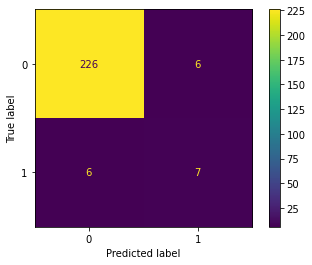

In [158]:
plot_confusion_matrix(model1, X_test, y_test)

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       232
           1       0.54      0.54      0.54        13

    accuracy                           0.95       245
   macro avg       0.76      0.76      0.76       245
weighted avg       0.95      0.95      0.95       245



In [160]:
lr_pred = y_pred

### Random Forest

In [161]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 16],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [162]:
model2 = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = model2, param_distributions = param_grid,  
                                   n_iter = 100, cv = 3, verbose=2, random_state=42)
random_search.fit(X_res, y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=20; total t

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=40, max_f

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=16, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [163]:
random_search.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [164]:
model2 = RandomForestClassifier(n_estimators=70, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)

In [165]:
model2.fit(X_res, y_res)
y_pred = model2.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


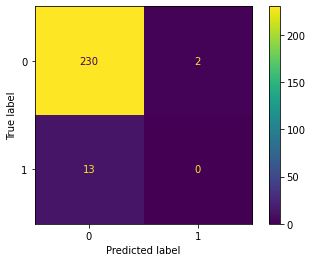

In [166]:
plot_confusion_matrix(model2, X_test, y_test)

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       232
           1       0.00      0.00      0.00        13

    accuracy                           0.94       245
   macro avg       0.47      0.50      0.48       245
weighted avg       0.90      0.94      0.92       245



### LSTM

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
max_words = 3000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seq = tok.texts_to_sequences(X_train)
seq_matrix = pad_sequences(seq, maxlen=max_len)

In [191]:
model3 = Sequential()
model3.add(Embedding(3000, 64, input_length=100))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

In [192]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           192000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 256)               16640     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)               

In [193]:
model3.fit(seq_matrix, y_train, batch_size=32, epochs=25)

Epoch 1/25
18/18 [==============================] - 3s 43ms/step - loss: 0.6155 - accuracy: 0.8704
Epoch 2/25
18/18 [==============================] - 1s 40ms/step - loss: 0.2848 - accuracy: 0.9194
Epoch 3/25
18/18 [==============================] - 1s 39ms/step - loss: 0.2450 - accuracy: 0.9212
Epoch 4/25
18/18 [==============================] - 1s 40ms/step - loss: 0.1886 - accuracy: 0.9212
Epoch 5/25
18/18 [==============================] - 1s 39ms/step - loss: 0.1260 - accuracy: 0.9212
Epoch 6/25
18/18 [==============================] - 1s 41ms/step - loss: 2561.3088 - accuracy: 0.9212
Epoch 7/25
18/18 [==============================] - 1s 40ms/step - loss: 0.1032 - accuracy: 0.9212
Epoch 8/25
18/18 [==============================] - 1s 38ms/step - loss: 0.0643 - accuracy: 0.9212
Epoch 9/25
18/18 [==============================] - 1s 38ms/step - loss: 0.0621 - accuracy: 0.9807
Epoch 10/25
18/18 [==============================] - 1s 40ms/step - loss: 0.0376 - accuracy: 0.9982
Epoch 

In [194]:
test_seq = tok.texts_to_sequences(X_test)
test_seq_matrix = pad_sequences(test_seq,maxlen=max_len)

In [195]:
score = model3.evaluate(test_seq_matrix, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

8/8 [==============================] - 0s 15ms/step - loss: 0.5373 - accuracy: 0.9347
Test loss: 0.5372709035873413
Test accuracy: 0.9346938729286194


In [196]:
pred = model3.predict(test_seq_matrix)
y_pred = np.where(pred < 0.5, 0, 1)

8/8 [==============================] - 0s 18ms/step


In [197]:
pred

array([[2.41690066e-12],
       [4.02156619e-09],
       [9.03212116e-10],
       [1.80829351e-09],
       [7.53523025e-04],
       [9.99987185e-01],
       [1.55261429e-10],
       [3.21339483e-11],
       [6.80370815e-10],
       [5.38009452e-04],
       [3.30002449e-11],
       [9.94323660e-03],
       [2.54141411e-14],
       [1.71872780e-05],
       [9.66658235e-01],
       [1.81935125e-08],
       [6.20525270e-07],
       [8.64872729e-10],
       [1.21823732e-11],
       [1.63232221e-06],
       [1.39539145e-06],
       [1.15519727e-09],
       [1.55196813e-05],
       [3.79394606e-11],
       [1.18704491e-11],
       [1.38073544e-08],
       [2.22561275e-10],
       [2.70138507e-08],
       [3.31669321e-06],
       [9.25163890e-10],
       [2.02493354e-07],
       [3.84979241e-04],
       [3.74884554e-03],
       [1.33838575e-05],
       [3.11925579e-02],
       [9.99980390e-01],
       [3.37424694e-07],
       [4.06693035e-09],
       [2.18230928e-03],
       [1.48260282e-04],


In [198]:
confusion_matrix(y_test, y_pred)

array([[225,   7],
       [  9,   4]], dtype=int64)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       232
           1       0.36      0.31      0.33        13

    accuracy                           0.93       245
   macro avg       0.66      0.64      0.65       245
weighted avg       0.93      0.93      0.93       245



In [200]:
lstm_pred = y_pred

### AdaBoost

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [202]:
ada = AdaBoostClassifier(random_state=42)

In [203]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1.0, 10]
}

In [204]:
random_search = RandomizedSearchCV(estimator = ada, param_distributions = param_grid,  n_iter = 100, cv = 3, verbose=2, random_state=42)

In [205]:
random_search.fit(X_res, y_res)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=20; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.7s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   0.8s
[CV] END .................learning_rate=0.1, n_estimators=40; total time=   1.0s
[CV] END .................learning_rate=0.1, n_

[CV] END .................learning_rate=0.8, n_estimators=40; total time=   0.8s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   1.1s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   1.1s
[CV] END .................learning_rate=0.8, n_estimators=50; total time=   1.1s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   1.3s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   1.3s
[CV] END .................learning_rate=0.8, n_estimators=60; total time=   1.3s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.5s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.6s
[CV] END .................learning_rate=0.8, n_estimators=70; total time=   1.5s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.8s
[CV] END .................learning_rate=0.8, n_estimators=80; total time=   1.8s
[CV] END .................le

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1.0, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [206]:
res_dict = random_search.best_params_
res_dict

{'n_estimators': 100, 'learning_rate': 1.0}

In [207]:
ada = AdaBoostClassifier(n_estimators = res_dict['n_estimators'], learning_rate = res_dict['learning_rate'], 
                        random_state=42)

In [208]:
ada.fit(X_res, y_res)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [209]:
y_pred = ada.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


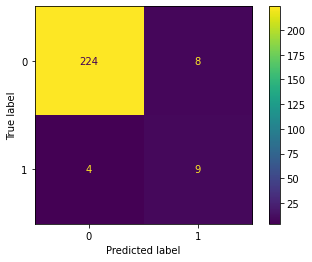

In [210]:
plot_confusion_matrix(ada, X_test, y_test)

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       232
           1       0.53      0.69      0.60        13

    accuracy                           0.95       245
   macro avg       0.76      0.83      0.79       245
weighted avg       0.96      0.95      0.95       245



In [212]:
ada_pred = y_pred

### One Class SVM

In [213]:
ocsvm = OneClassSVM()

In [214]:
ocsvm = OneClassSVM(kernel = 'rbf')

In [215]:
ocsvm.fit(X_res, y_res)

OneClassSVM()

In [216]:
y_pred = ocsvm.predict(X_test)

In [217]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1,  1, -1, -1

In [218]:
y_pred = np.vectorize(lambda x: 0 if x == -1 else x)(y_pred)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       232
           1       0.10      0.38      0.16        13

    accuracy                           0.78       245
   macro avg       0.53      0.60      0.52       245
weighted avg       0.91      0.78      0.84       245



In [220]:
res = pd.DataFrame([lr_pred, lstm_pred, ada_pred]).transpose()

In [221]:
res

,0,1,2
0,0,[0],0
1,0,[0],0
2,0,[0],0
3,0,[0],0
4,0,[0],0
...,...,...,...
240,0,[0],0
241,0,[0],0
242,0,[1],0
243,0,[0],0


In [222]:
res[1] = res[1].apply(lambda x: x[0])

In [223]:
res

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
240,0,0,0
241,0,0,0
242,0,1,0
243,0,0,0


In [224]:
res['total'] = res.mode(axis=1)[0]

In [225]:
res['total']

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    0
Name: total, Length: 245, dtype: int64

In [226]:
res

,0,1,2,total
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
240,0,0,0,0
241,0,0,0,0
242,0,1,0,0
243,0,0,0,0


In [231]:
confusion_matrix(y_test, res['total'])

array([[228,   4],
       [  4,   9]], dtype=int64)

In [230]:
print(classification_report(y_test, res['total']))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       232
           1       0.69      0.69      0.69        13

    accuracy                           0.97       245
   macro avg       0.84      0.84      0.84       245
weighted avg       0.97      0.97      0.97       245



In [228]:
print(accuracy_score(y_test, res['total']))
print(precision_score(y_test, res['total']))
print(recall_score(y_test, res['total']))
print(f1_score(y_test, res['total']))

0.9673469387755103
0.6923076923076923
0.6923076923076923
0.6923076923076923


In [291]:
lr_17 = 'lr_17_model.sav'
lstm_17 = 'lstm_17_model.sav'
ada_17 = 'ada_17_model.sav'
tfidf_17 = 'tfidf_17_model.sav'
tok_17 = 'tok_17_model.pickle'

In [292]:
pickle.dump(tfidf, open(tfidf_17, 'wb'))
pickle.dump(model1, open(lr_17, 'wb'))
model3.save('lstm_17_model.h5')
pickle.dump(ada, open(ada_17, 'wb'))
pickle.dump(tok, open(tok_17, 'wb'))

## Attribute 15 Second Layer

In [26]:
df_ext_ones = pd.read_csv('ext_ones_labelled.csv')

In [27]:
df_ext_ones.head()

,words,GT,new_GT
0,The certified locations are audited by externa...,1,0
1,GRI 102-56 see Assurance Report With the excep...,1,0
2,We conducted our assurance engagement in accor...,1,0
3,Tian LLP has provided limited assurance on sel...,1,1
4,And the result will be audited by a third part...,1,0


In [ ]:
X = df_ext_ones['words']
y = df_ext_ones['new_GT']